In [75]:
import numpy as np
import matplotlib.pyplot as plt


In [58]:
patterns=[[-1,-1,1],[1,-1,1],[-1,1,1],[1,1,1]]
targets=[-1,1,1,-1]
lr=0.001
W=np.random.normal(0,1,3)
epochs=20

In [33]:
def delta_weight_optim(epochs,patterns,targets,W):
    for epoch in range(0,epochs):
        delta=-lr*np.matmul((np.matmul(patterns,W)-targets),patterns)
        W=W+delta

    return W

In [88]:
def delta_sequent(epochs,patterns,targets,W):
    for epoch in range(0,epochs):
        for i in range(0,patterns.shape[0]):
            delta=-lr*np.dot((np.dot(patterns[i,:],W)-targets[i]),patterns[i,:])
            W=W+delta
            t=np.linspace(-3,3)
            plt.plot(t,((W[0]*t+W[2])/W[1]))



    return W

In [36]:
Optim_W=delta_weight_optim(epochs,patterns,targets,W)
output=np.matmul(patterns,W)
print(f'final output:{output}')

final output:[ 0.43661809  2.92091532 -3.31381204 -0.82951481]


exercise 3

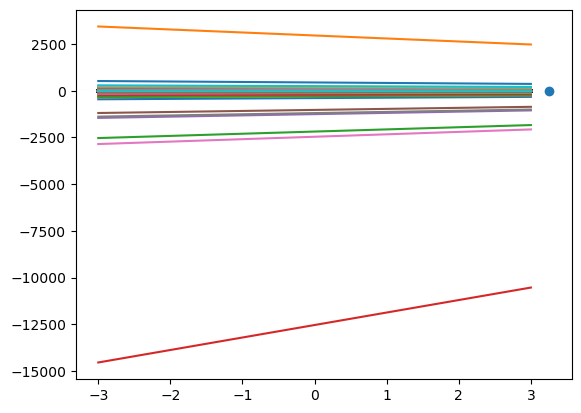

In [89]:
x=np.random.multivariate_normal([1,0.5],[[0.5,0],[0,0.5]],100)
x2=np.random.multivariate_normal([-1,0.5],[[0.5,0],[0,0.5]],100)
plt.scatter(x[:,0],x[:,1])
target=np.ones((200))
target[100:]=-1
plt.scatter(x2[:,0],x2[:,1],c='deeppink')
bias=np.ones(200)
data=np.concatenate((x,x2),0)
data=np.column_stack((data,bias))
np.random.seed(42)
np.random.shuffle(data)
np.random.shuffle(target)
new_weight=delta_weight_optim(epochs,data,target,W)
next_output=np.matmul(data,new_weight)
output_w=delta_sequent(epochs,data,target,W)